# Credit Default Model

In [2]:
#Importing all the libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import pyplot
from pylab import rcParams
import seaborn as sns

import scipy 
from scipy import stats 
import statsmodels.api as sm
import sklearn
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
sklearn.metrics.ConfusionMatrixDisplay

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.metrics import AUC

import warnings
warnings.filterwarnings("ignore")

In [11]:
#loading the data
df=pd.read_csv("/lending_club_loan_two.csv")

In [3]:
#displaying the data
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [ ]:
#checking data shape
df.shape

(396030, 27)

In [ ]:
#Checking the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
#describe the statistics of the data
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [ ]:
#checking the duplicate Values in the data
df.duplicated().sum()

0

In [ ]:
#checking the missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data

,total,percent
mort_acc,37795,0.095435
emp_title,22927,0.057892
emp_length,18301,0.046211
title,1755,0.004431
pub_rec_bankruptcies,535,0.001351
revol_util,276,0.000697
loan_amnt,0,0.000000
dti,0,0.000000
application_type,0,0.000000
initial_list_status,0,0.000000


In [ ]:
#checking the unique valeus of all the columns of the dataset
df.nunique(axis=0)

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

# **Exploratory Analysis**

In [4]:
#checking the unique values of the Target Variable
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [12]:
#Since there are two types of unique variable, converting it into binary codes
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

In [6]:
#Target Variable is in in Binary Format now
df['loan_status'].unique()

array([0, 1])

In [7]:
#checking the number of Defauters and non Defaulters that is counting the number of 0s and 1s
df['loan_status'].value_counts(normalize=True) * 100

0    80.387092
1    19.612908
Name: loan_status, dtype: float64

Text(0.5, 1.0, 'Count of the Defaulters (1) and non credit defaulters (0)')

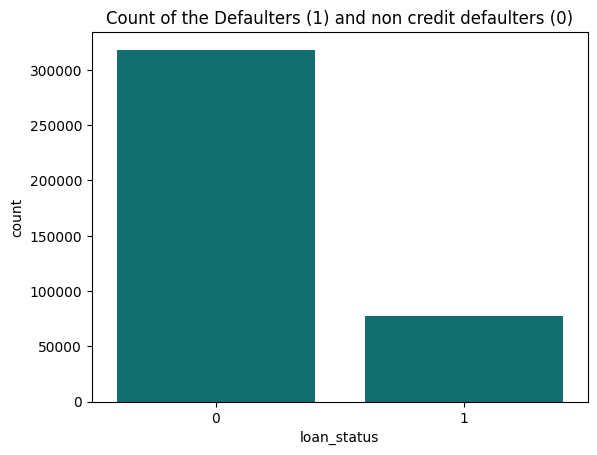

In [ ]:
#visulalizing Defaulters and Non Defaulters
sns.countplot(x=df['loan_status'],data=df,color="teal").set_title("Count of the Defaulters (1) and non credit defaulters (0)")

Data is Imbalanced, will need to balance the data to be able to get more accuarte models

# **Visualizations**

Text(0.5, 1.0, 'Loan status count as per terms')

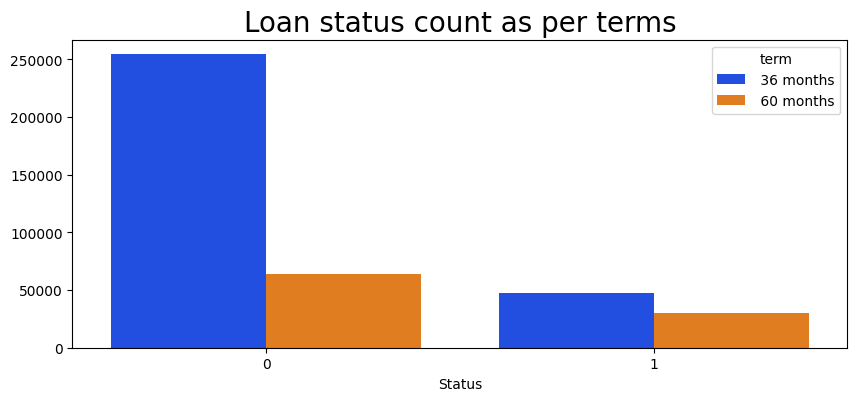

In [ ]:
#Checking the Target Varible versus loan terms
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="loan_status",hue="term",palette='bright')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count as per terms', size=20)

*From Above graph, Mostly Defaulters are the ones who had short duration of loan that is 36 Months*

Text(0.5, 1.0, 'Loan status count')

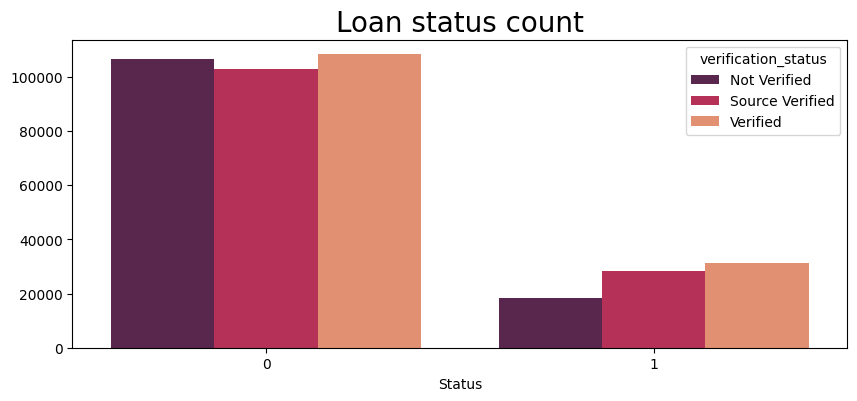

In [ ]:
#Checking the Loan Status versus verified or non verified 
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="loan_status",hue="verification_status",palette='rocket')
ax.set(xlabel='Status', ylabel='')
ax.set_title('Loan status count', size=20)

*Mostly Defaulters were whose Income were Verfied,or their source of income was verified.*

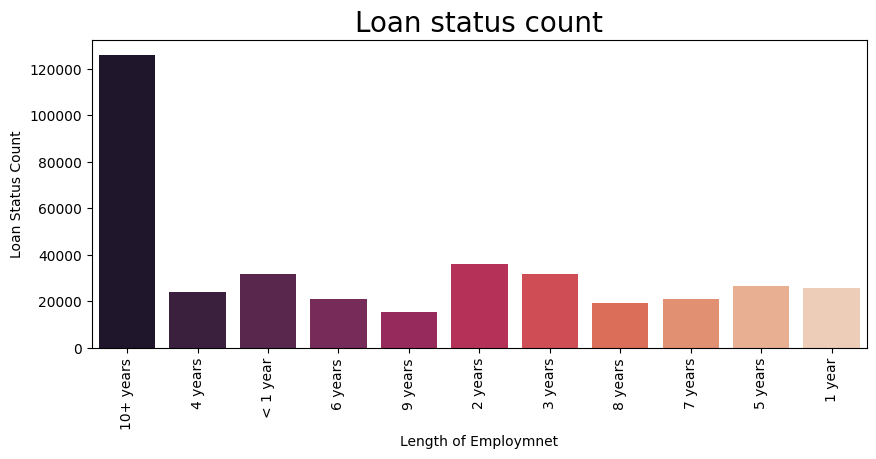

In [ ]:
#Loan status versus lenghth of employment
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,x="emp_length",palette='rocket')
ax.set(xlabel='Length of Employmnet', ylabel='Loan Status Count')
ax.set_title('Loan status count', size=20)
plt.xticks(rotation='vertical')
plt.show()

Most of the people have 10+years of experience.

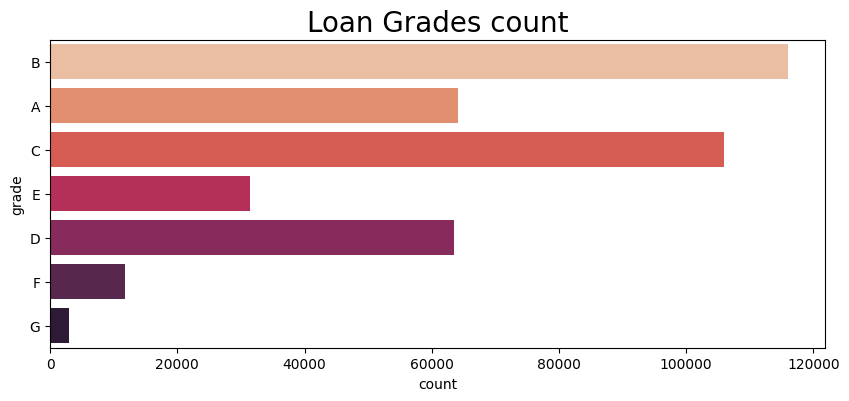

In [ ]:
#Loan Status versus Grades
fig, ax =plt.subplots(figsize=(10,4))
sns.countplot(data=df,y="grade",palette='rocket_r')
ax.set_title('Loan Grades count', size=20)
plt.show()

Mostly loan issued were Grade B

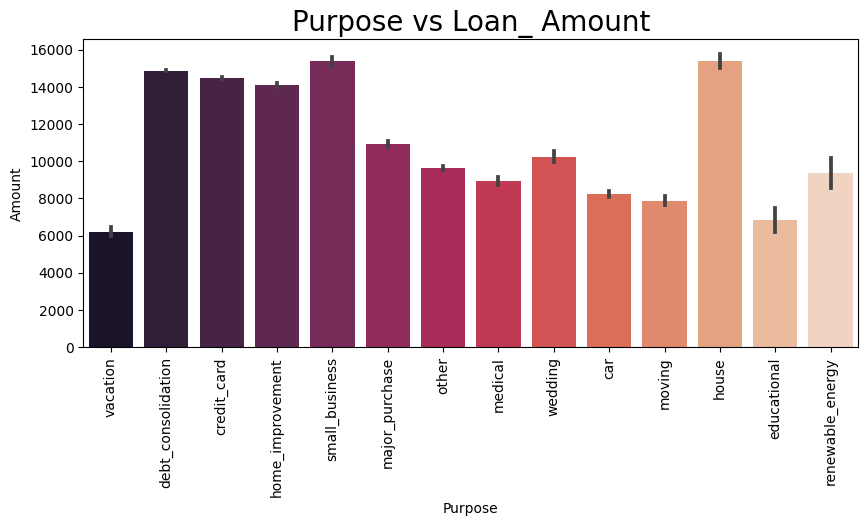

In [ ]:
#Purpose of taking loan versus Loan Status
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=df,x="purpose",y='loan_amnt',palette='rocket')
ax.set(xlabel='Purpose', ylabel='Amount')
ax.set_title('Purpose vs Loan_ Amount', size=20)
plt.xticks(rotation='vertical')
plt.show()

Majorly Loan was issued for buying House or Setting Small Businesss followed by paying other loans

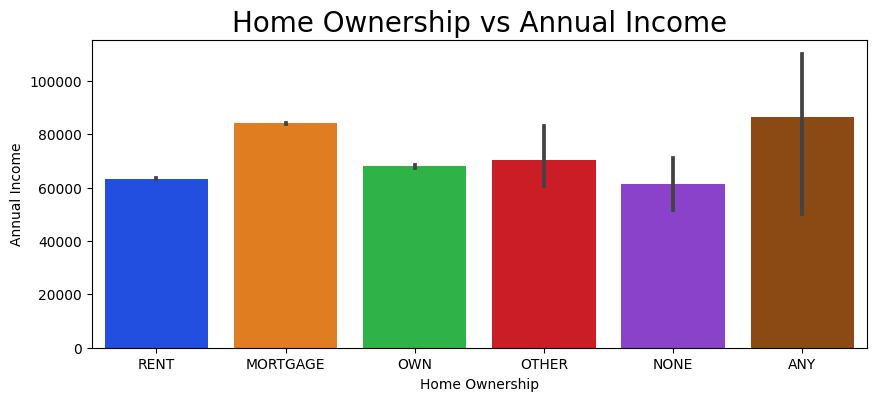

In [ ]:
#Home Ownership versus Annual Income
fig, ax =plt.subplots(figsize=(10,4))
sns.barplot(data=df,x="home_ownership",y='annual_inc',palette='bright')
ax.set(xlabel='Home Ownership', ylabel='Annual Income')
ax.set_title('Home Ownership vs Annual Income', size=20)
plt.show()

*Mostof the People who have Annual Income of 80K plus, are mortaginig their Houses,and People with Income of 60K own the houses.*

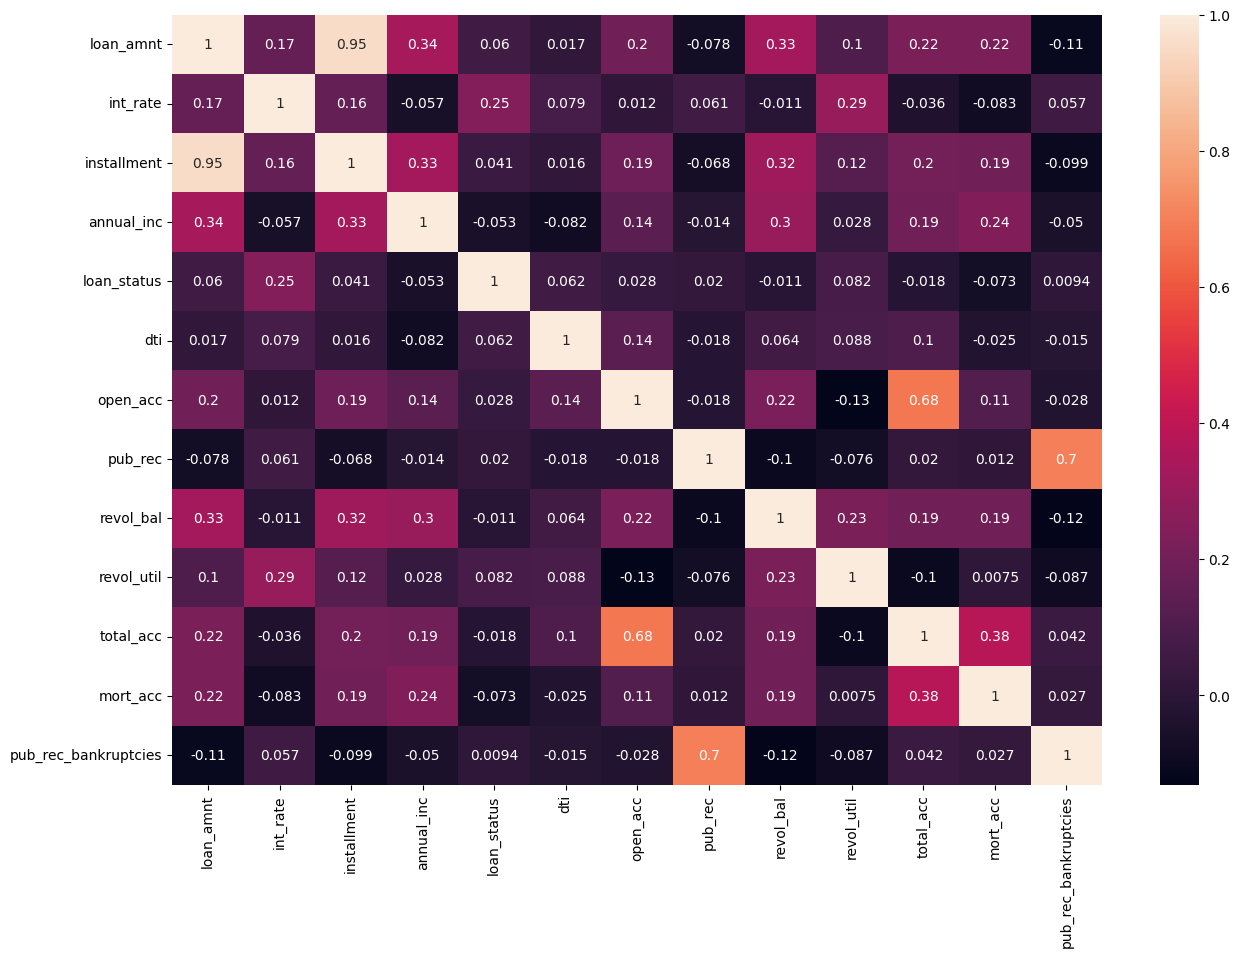

In [ ]:
#Correlation Matrix for all the features
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

There is no much correlation between the data, except Publich records and Publich Record Bakruptcy, which is obvious corelation, we will deal with it in later stage

In [ ]:
# Dividing our features into categorical and numerical

categorical=[feature for feature in df.columns if df[feature].dtype=='object']
print("Categorical Features",categorical)
numerical=[feature for feature in df.columns if feature not in categorical]
print("Numerical Features",numerical)

Categorical Features ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']
Numerical Features ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


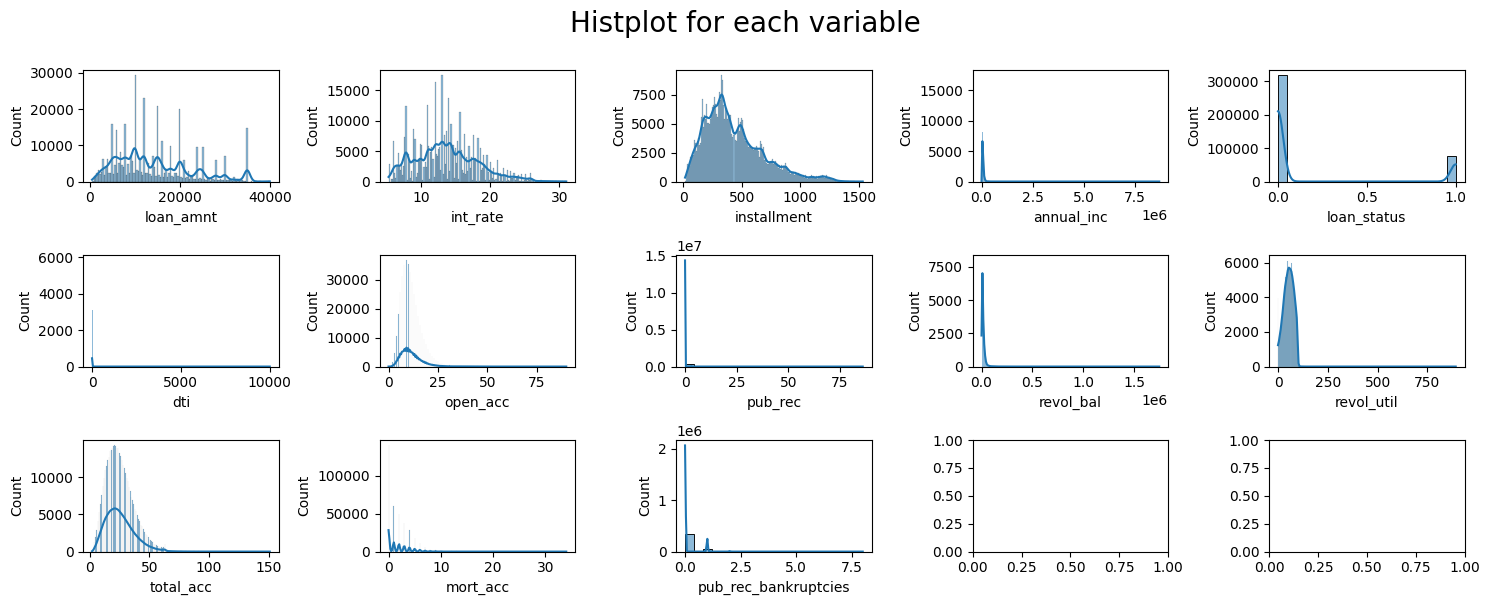

In [ ]:
# Histplot for each variable in numerical list
def histplot_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Histplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.histplot(data=data[feature],ax=ax[i], kde=True)
histplot_visual(data=df,column=numerical)
plt.tight_layout()

Data is skewed and imbalanced so we will balance the data as well.

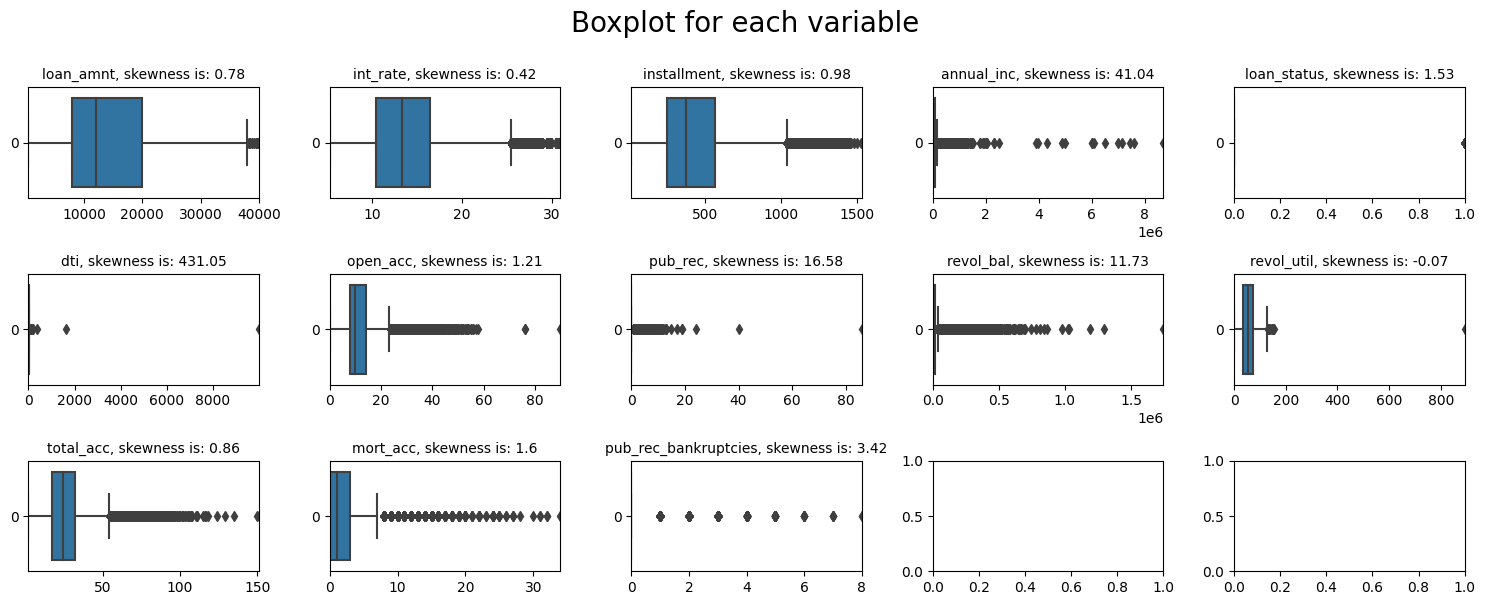

In [ ]:
# Boxplot for each variable in numerical list
def boxplots_visual(data,column):
    fig, ax = plt.subplots(3,5,figsize=(15,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=10)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df,column=numerical)
plt.tight_layout()

Most of the data is Left Skewed.

# **Data PreProcessing**

There are some categorical features which needs to be converted into numerical values to be able to fit them into models, Some categorical Features like Term, Grade, Sub Grade, Employment length needed to be converted in different way than other features like Home Ownership, Verification Status which had simple catgeories and can be converted directly.

In [8]:
#checking the unique value of the feature Term
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [13]:
#Mapping the terms to their integer values
df['term'] = df['term'].map({' 36 months': 36, ' 60 months': 60})

In [10]:
df['term'].unique()

array([36, 60])

In [11]:

df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [14]:
#cleaning the emp_length which is employment length into integer values
df['emp_length']= df['emp_length'].str.replace(r'[^0-9]','')
df['emp_length']= df['emp_length'].str.replace(' ','')
df['emp_length'] = pd.Categorical(df['emp_length']).codes

In [15]:
df['emp_length'].unique()

array([ 1,  4,  0,  6,  9,  2,  3,  8,  7,  5, -1], dtype=int8)

In [16]:
# Defining a function to convert grades to their ASCII Values
def grade_to_numeric(x):
    return ord(x) - 65

# Defining a function to convert subgrades to ASCII values
def subgrade_to_numeric(x):
    return int(x[1:]) + (ord(x[0]) - 65) * 5


df['grade'] = df['grade'].apply(grade_to_numeric)
df['sub_grade'] = df['sub_grade'].apply(subgrade_to_numeric)

In [17]:
df['grade'].unique()

array([1, 0, 2, 4, 3, 5, 6])

In [18]:
df['sub_grade'].unique()

array([ 9, 10,  8,  2, 15, 13,  1,  7, 11,  5, 24,  4,  3, 16, 12,  6, 18,
       20, 17, 21, 22, 25, 29, 23, 19, 31, 30, 32, 14, 26, 28, 35, 34, 27,
       33])

Converting all the features which were categorical and had more than 2 types of unique data points, converting them in Numerical Values

In [17]:
df['home_ownership'] = pd.Categorical(df['home_ownership']).codes

In [18]:
df['verification_status'] = pd.Categorical(df['verification_status']).codes

In [19]:
df['purpose'] = pd.Categorical(df['purpose']).codes

In [20]:
df['initial_list_status'] = pd.Categorical(df['initial_list_status']).codes

In [21]:
df['application_type'] = pd.Categorical(df['application_type']).codes

In [25]:
#checking to see how datframes looks now
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,1,9,Marketing,1,5,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,1,10,Credit analyst,4,1,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,1,8,Statistician,0,5,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,0,2,Client Advocate,6,5,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,2,15,Destiny Management Inc.,9,1,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [26]:
#getting the informatin of updated Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int64  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  int64  
 5   sub_grade             396030 non-null  int64  
 6   emp_title             373103 non-null  object 
 7   emp_length            396030 non-null  int8   
 8   home_ownership        396030 non-null  int8   
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  int8   
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  int64  
 13  purpose               396030 non-null  int8   
 14  title                 394275 non-null  object 
 15  

In [27]:
#checking for null Values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data

,total,percent
mort_acc,37795,0.095435
emp_title,22927,0.057892
title,1755,0.004431
pub_rec_bankruptcies,535,0.001351
revol_util,276,0.000697
loan_amnt,0,0.000000
application_type,0,0.000000
initial_list_status,0,0.000000
total_acc,0,0.000000
revol_bal,0,0.000000


In [22]:
#since there are not many null values,d ropping the null values
df.dropna(subset=['mort_acc', 'emp_title', 'emp_length','title','pub_rec_bankruptcies','revol_util'], inplace=True)


In [29]:
#checking null values again
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1,keys=["total","percent"])
missing_data

,total,percent
loan_amnt,0,0.0
title,0,0.0
pub_rec_bankruptcies,0,0.0
mort_acc,0,0.0
application_type,0,0.0
initial_list_status,0,0.0
total_acc,0,0.0
revol_util,0,0.0
revol_bal,0,0.0
pub_rec,0,0.0


In [30]:
#checking the information of the Dataframe again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335995 entries, 0 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             335995 non-null  float64
 1   term                  335995 non-null  int64  
 2   int_rate              335995 non-null  float64
 3   installment           335995 non-null  float64
 4   grade                 335995 non-null  int64  
 5   sub_grade             335995 non-null  int64  
 6   emp_title             335995 non-null  object 
 7   emp_length            335995 non-null  int8   
 8   home_ownership        335995 non-null  int8   
 9   annual_inc            335995 non-null  float64
 10  verification_status   335995 non-null  int8   
 11  issue_d               335995 non-null  object 
 12  loan_status           335995 non-null  int64  
 13  purpose               335995 non-null  int8   
 14  title                 335995 non-null  object 
 15  

In [31]:
df.shape

(335995, 27)

# **Model Preparation**

Divinding the data into depedent and independent variables dataframes, to fit into the model

In [23]:
X = df.drop(columns=['emp_title','issue_d','title','earliest_cr_line', 'address','loan_status'],axis = 1)
y = df['loan_status']

In [33]:
X.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,1,9,1,5,117000.0,0,...,26.24,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0
1,8000.0,36,11.99,265.68,1,10,4,1,65000.0,0,...,22.05,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0
2,15600.0,36,10.49,506.97,1,8,0,5,43057.0,1,...,12.79,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0
3,7200.0,36,6.49,220.65,0,2,6,5,54000.0,0,...,2.60,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0
4,24375.0,60,17.27,609.33,2,15,9,1,55000.0,2,...,33.95,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0


In [34]:
X.shape, y.shape

((335995, 21), (335995,))

In [24]:
# Using SMOTE to balance the dataset
import imblearn
import seaborn as sns
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_data, Y_data = smote.fit_resample(X,y)

In [36]:
X_data.shape,Y_data.shape

((539290, 21), (539290,))

<Axes: xlabel='loan_status', ylabel='count'>

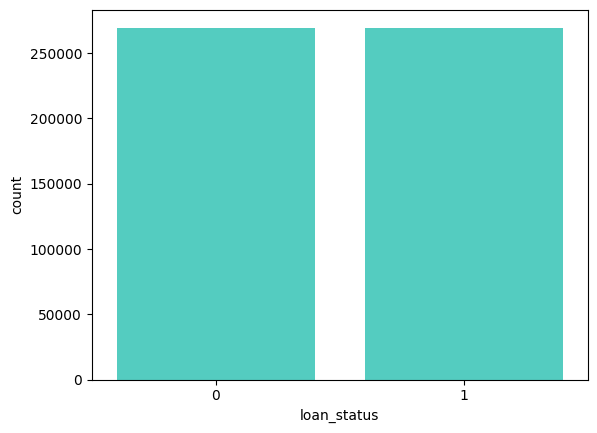

In [37]:
sns.countplot(x = Y_data, color="turquoise")

Data is Balanced now

In [38]:
X_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,1,9,1,5,117000.0,0,...,26.24,16.0,0.0,36369.0,41.8,25.0,1,1,0.0,0.0
1,8000.0,36,11.99,265.68,1,10,4,1,65000.0,0,...,22.05,17.0,0.0,20131.0,53.3,27.0,0,1,3.0,0.0
2,15600.0,36,10.49,506.97,1,8,0,5,43057.0,1,...,12.79,13.0,0.0,11987.0,92.2,26.0,0,1,0.0,0.0
3,7200.0,36,6.49,220.65,0,2,6,5,54000.0,0,...,2.60,6.0,0.0,5472.0,21.5,13.0,0,1,0.0,0.0
4,24375.0,60,17.27,609.33,2,15,9,1,55000.0,2,...,33.95,13.0,0.0,24584.0,69.8,43.0,0,1,1.0,0.0


Splitting the balanced data into training and testing sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.30, random_state=1)


In [26]:
# MinMax Scaler for scaling the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **BASELINE MODEL**

In [41]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score 

dummy = DummyClassifier(random_state=1)
dummy.fit(X_train, y_train)
dummypreds = dummy.predict(X_test)

print(f"Dummy Accuracy: {accuracy_score(y_test, dummypreds)}")
print(f"Dummy ROC-AUC: {roc_auc_score(y_test, dummypreds)}")

Dummy Accuracy: 0.49983620439219467
Dummy ROC-AUC: 0.5


Baseline acuuracy is 49%, so we need to attend more accuracy than that to be able to decide good model.

# **MODEL 1**

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

logistics_regressor = LogisticRegression()

history=logistics_regressor.fit(X_train, y_train)

y_predict = logistics_regressor.predict(X_test)

In [28]:
print("Training R-Squared: ", logistics_regressor.score(X_train, y_train))
print("Test R-Squared: ", logistics_regressor.score(X_test, y_test))

Training R-Squared:  0.7091466822780216
Test R-Squared:  0.709185534066396


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test,y_predict))
print()
print()
print("Classification Report")
print(classification_report(y_test,y_predict))
from sklearn.metrics import accuracy_score
print("Logistic Regression Model Accuracy is\n ",accuracy_score(y_test,y_predict, normalize = True) * 100)

Confusion Matrix
[[57863 23004]
 [24046 56874]]


Classification Report
              precision    recall  f1-score   support

           0       0.71      0.72      0.71     80867
           1       0.71      0.70      0.71     80920

    accuracy                           0.71    161787
   macro avg       0.71      0.71      0.71    161787
weighted avg       0.71      0.71      0.71    161787

Logistic Regression Model Accuracy is
  70.91855340663959


Accuracy of training and Test dataset are better than our baseline model, however data can still do better so we will try more models

# **MODEL 2**

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
  
# fit the regressor with x and y data
random_forest.fit(X_train, y_train)  

random_y_predicted = random_forest.predict(X_test)

In [48]:
#Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Convert continuous predictions to binary
threshold = 0.5
binary_y_predicted = [1 if val >= threshold else 0 for val in random_y_predicted]

# Compute classification report, confusion matrix, and accuracy score
classificationReport = classification_report(y_test, binary_y_predicted)
print("classification report:\n", classificationReport)

print()
ConfusionMatrix = confusion_matrix(y_test, binary_y_predicted)
print("Confusion matrix report:\n", ConfusionMatrix)

print()
AccuracyScore = accuracy_score(y_test, binary_y_predicted, normalize=True) * 100
print("Balanced accuracy for random forest:\n", AccuracyScore)


classification report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87     80867
           1       0.92      0.79      0.85     80920

    accuracy                           0.86    161787
   macro avg       0.87      0.86      0.86    161787
weighted avg       0.87      0.86      0.86    161787


Confusion matrix report:
 [[75425  5442]
 [16959 63961]]

Balanced accuracy for random forest:
 86.15401731906766


Random Forest is performing better than Logistic but we can still check to see if any other model is performing better

# **MODEL 3**

# XG Booster

In [49]:
# XGBoost with original data

from xgboost import XGBClassifier


# fit model no training data
XGBModel = XGBClassifier()
XGBModel.fit(X_train, y_train)

# make predictions for test data
y_pred = XGBModel.predict(X_test)

In [52]:
# Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

XGBClaasificationReport = classification_report(y_test, y_pred)
print("classification report:\n", XGBClaasificationReport)

print()
XGBConfusionMatrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix report:\n", XGBConfusionMatrix)

print()
XGBbal_accuracy = accuracy_score(y_test,y_pred, normalize = True) * 100 
print("Balanced accuracy for Logistic Regression \n:", XGBbal_accuracy)


classification report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89     80867
           1       0.96      0.78      0.86     80920

    accuracy                           0.88    161787
   macro avg       0.89      0.88      0.87    161787
weighted avg       0.89      0.88      0.87    161787


Confusion matrix report:
 [[78549  2318]
 [17828 63092]]

Balanced accuracy for Logistic Regression 
: 87.547825226996


Text(0, 0.5, 'Recall')

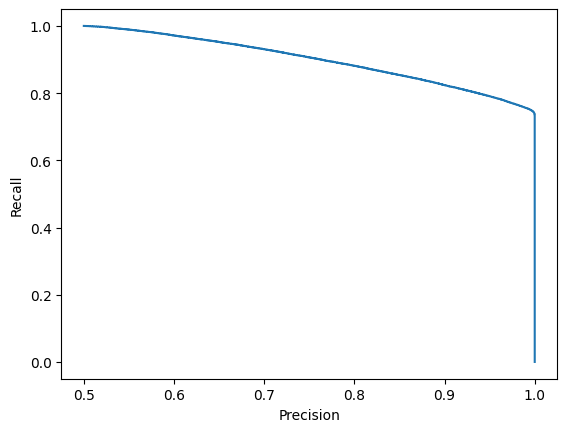

In [53]:
# PR curve


from sklearn.metrics import precision_recall_curve 
precision, recall, thresholds = precision_recall_curve(y_test,XGBModel.predict_proba(X_test)[:,1])


plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")

So far XG Booster is performing best of all with accuracy of 87%, but stil checking if it any other model can perform better

Importing all the classifiers models

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [57]:
#training all the classifier models
models = {
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                Support Vector Machine": LinearSVC(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   K-Nearest Neighbors trained.
                         Decision Tree trained.
                Support Vector Machine trained.
                     Gradient Boosting trained.


In [61]:
#3 fold cross validation for choosing the top models
models = {
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                Support Vector Machine": LinearSVC(),
    "                     Gradient Boosting": GradientBoostingClassifier()
}

mean_df = []
for name, model in models.items():
  mean_arr = {}
  cv_results = cross_val_score(model, X_train, y_train, cv=3)
  print(name, cv_results)
  mean = np.mean(cv_results)
  mean_arr['name']=name
  mean_arr['result']=mean
  mean_df.append(mean_arr)
  
    

                   K-Nearest Neighbors [0.73965908 0.73877489 0.73740007]
                         Decision Tree [0.7761831  0.77823959 0.78234817]
                Support Vector Machine [0.7103588  0.70845717 0.70943465]
                     Gradient Boosting [0.84437557 0.84464453 0.84358758]


So far only Grient Boosting is doing better among these model, however stil not able to perform better than XG Booster.

# **Model Comparison**

In [6]:
#comparing all the models performed
details = {
    'Model' : ['BaseLine Model %',
               'K-Nearest Neighbors %',
               'Decision Tree %',
               'Support Vector Machine %',
               'Gradient Boosting',
               'Logistic Regression %' , 
               'Random Forest %',
               'XG Booster %',
              ],
    'Accuracy' : [49.88,73.87,77.82,70.84,84.464,70.86,86.27,87.54],
}

scores_df = pd.DataFrame(details,index=["Baseline_Model","KNN","Decison Tree","SVM","Gradient Boosting","Logistics","Random Forest","XG Booster"])
scores_df

,Model,Accuracy
Baseline_Model,BaseLine Model %,49.880
KNN,K-Nearest Neighbors %,73.870
Decison Tree,Decision Tree %,77.820
SVM,Support Vector Machine %,70.840
Gradient Boosting,Gradient Boosting,84.464
Logistics,Logistic Regression %,70.860
Random Forest,Random Forest %,86.270
XG Booster,XG Booster %,87.540


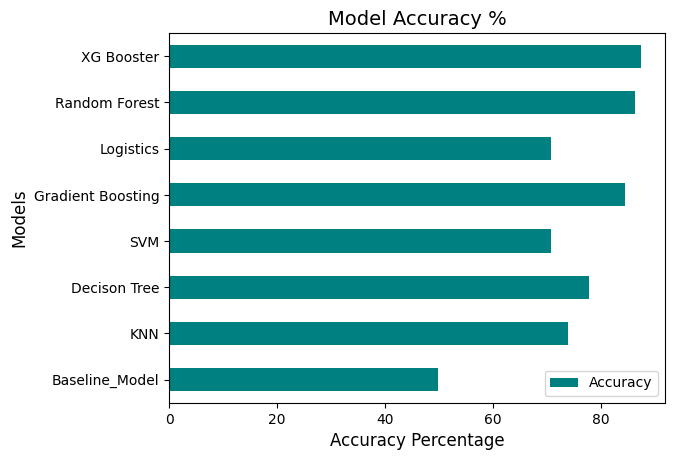

In [66]:
#plotting the Model comparison
import matplotlib.pyplot as plt


ax = scores_df.plot(kind="barh", color=["teal"])

ax.set_xlabel("Accuracy Percentage", fontsize=12)
ax.set_ylabel("Models", fontsize=12)
ax.set_title("Model Accuracy %", fontsize=14)

plt.show()


XG Booster is the best model for the dataset

# **FEATURE IMPORTANCE**

Checking to see what features were affecting the models most

In [ ]:
#installing Shapley library for feature importance
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 12.9 MB/s eta 0:00:00


In [ ]:
#installing shapley and running on data
import shap
explainer = shap.Explainer(XGBModel, X_train)
shap_values = explainer.shap_values(X_test)

100%|===================| 161729/161734 [11:23<00:00]       

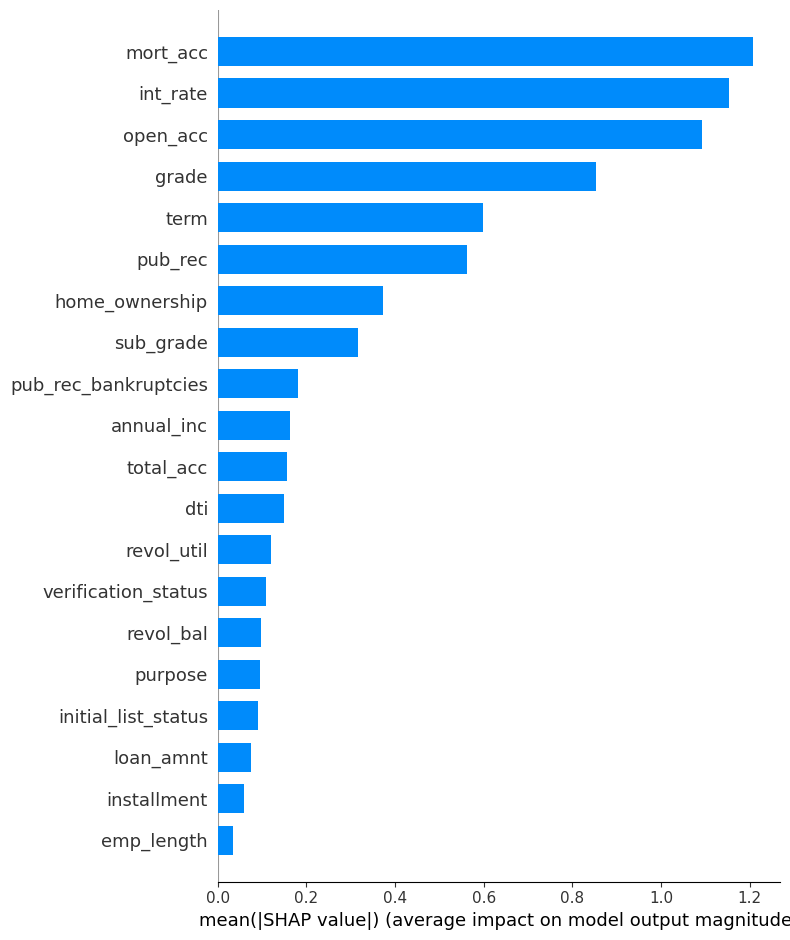

In [ ]:
#Plotting the feature importance graph
feature_names = df.drop(columns=['emp_title','issue_d','title','earliest_cr_line', 'address','loan_status'],axis = 1)
shap.summary_plot(shap_values, plot_type = 'bar', feature_names = feature_names.columns)

Mortagage Account, followed by Interest Rate and No of open credit accounts affected the models most. It makes sense since most of the loan was issued for paying the mortgage and more numebr of credit lines opened account for more debt

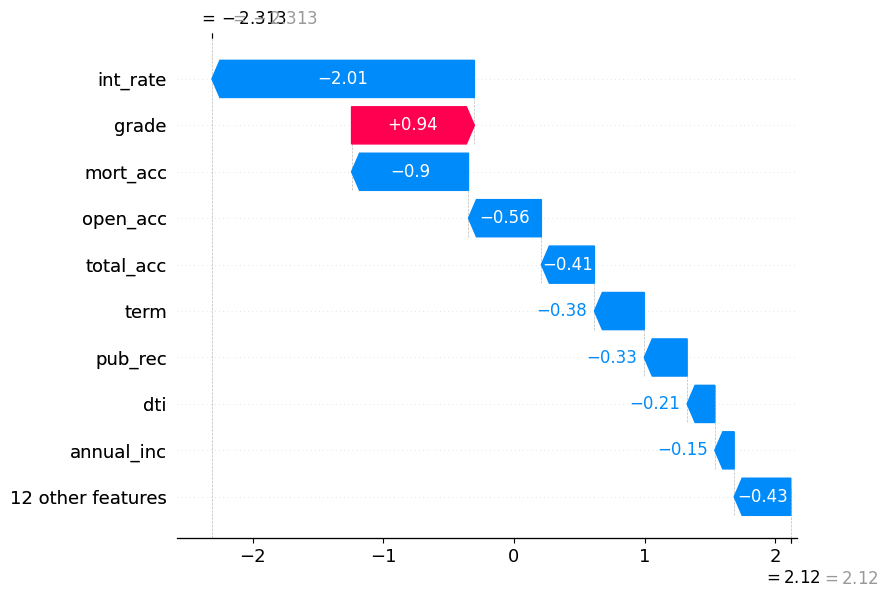

In [ ]:
#Graph showing feature affected the models postiveley or negatively 
shap.initjs()
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names=feature_names.columns)


Interest rate affected the accuarcy of the model by -2.01 and grades affted the accuarcy of the model by positive .94

# **CONCLUSION**

Overall, XG Booster is the best model for the credit Card Default Model

While deciding to issue credit loans, Number of Mortgage account opened, Interest rate of the Loan, Grade of the Loan, Total open Credit lines of the customer and term of the loan should be taken into account for the decision.